# **Preparations**

For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-worldwide-refined-dataset/covid_dataset.csv


In [2]:
# Load the dataset
file_path = '/kaggle/input/covid-19-worldwide-refined-dataset/covid_dataset.csv'  # update with your file path if needed
df = pd.read_csv(file_path)
print("Dataset loaded")

Dataset loaded


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  225 non-null    int64 
 1   country     225 non-null    object
 2   code        224 non-null    object
 3   confirmed   225 non-null    int64 
 4   recovered   225 non-null    int64 
 5   critical    225 non-null    int64 
 6   deaths      225 non-null    int64 
 7   lastChange  225 non-null    object
 8   lastUpdate  225 non-null    object
dtypes: int64(5), object(4)
memory usage: 15.9+ KB


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0      country code  confirmed  recovered  critical  deaths  \
0           0  Afghanistan   AF     234174     211080         0    7996   
1           2      Albania   AL     334863     330233         0    3605   
2           3      Algeria   DZ     272010     183061         0    6881   
3           5      Andorra   AD      48015      47563         0     165   
4           6       Angola   AO     107327     103419         0    1937   

                  lastChange                 lastUpdate  
0  2024-06-04T00:18:51+00:00  2024-08-09T09:13:41+00:00  
1  2024-06-04T00:27:05+00:00  2024-08-09T09:13:41+00:00  
2  2024-06-04T00:19:02+00:00  2024-08-09T09:13:41+00:00  
3  2024-02-11T22:05:54+00:00  2024-08-09T09:13:41+00:00  
4  2024-06-04T00:20:45+00:00  2024-08-09T09:13:41+00:00  


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0    0
country       0
code          1
confirmed     0
recovered     0
critical      0
deaths        0
lastChange    0
lastUpdate    0
dtype: int64


In [6]:
# Data summary
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Unnamed: 0     confirmed     recovered    critical        deaths
count  225.000000  2.250000e+02  2.250000e+02  225.000000  2.250000e+02
mean   124.328889  3.116295e+06  2.624231e+06   12.786667  3.117617e+04
std     71.171186  1.014304e+07  9.313309e+06   72.089718  1.105688e+05
min      0.000000  1.000000e+01  0.000000e+00    0.000000  0.000000e+00
25%     63.000000  2.733400e+04  1.542700e+04    0.000000  1.940000e+02
50%    126.000000  2.303540e+05  1.406220e+05    0.000000  2.250000e+03
75%    186.000000  1.356546e+06  1.258432e+06    0.000000  1.630300e+04
max    247.000000  1.118201e+08  1.098144e+08  940.000000  1.219487e+06


In [7]:
# Column data types
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
Unnamed: 0     int64
country       object
code          object
confirmed      int64
recovered      int64
critical       int64
deaths         int64
lastChange    object
lastUpdate    object
dtype: object


**Key Points:**

* Number of Entries: The dataset contains 225 rows, indexed from 0 to 224.
* Number of Columns: There are 9 columns in the DataFrame.

**Column Details:**

* Unnamed: 0: An integer column likely representing an index or an ID.
* country: An object (string) column indicating the country name.
* code: An object (string) column containing country codes, with one missing value (224 non-null entries).
* confirmed, recovered, critical, deaths: Integer columns containing COVID-19 related data.
* lastChange, lastUpdate: Object (string) columns representing date and time information.

**Others:**

* Missing Data: The code column has one missing entry.
* Data Types: The dataset includes 5 columns with integer (int64) data types and 4 columns with object (object) data types.

# Cleaning

In [8]:
# Basic data cleaning (if necessary)
df = df.dropna()

# Graph

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


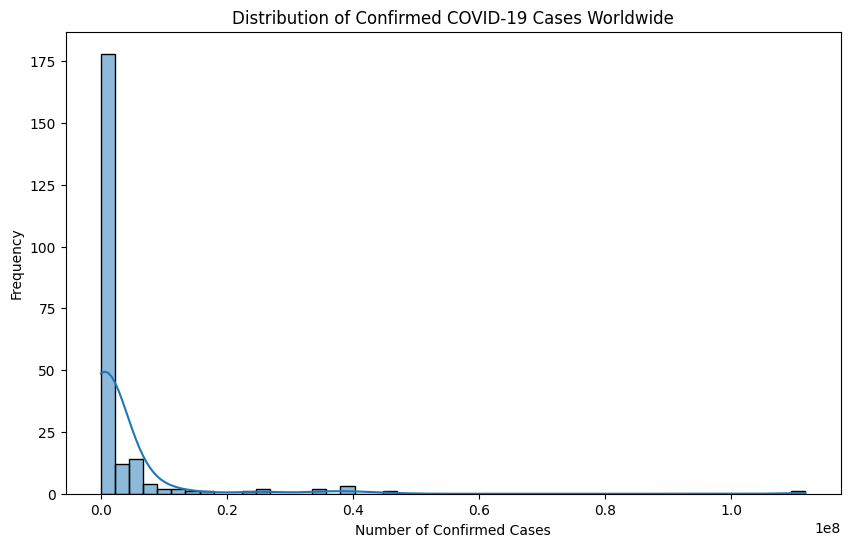

In [9]:
# 1. Distribution of COVID-19 cases worldwide
plt.figure(figsize=(10, 6))
sns.histplot(df['confirmed'], bins=50, kde=True)
plt.title('Distribution of Confirmed COVID-19 Cases Worldwide')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Frequency')
plt.show()

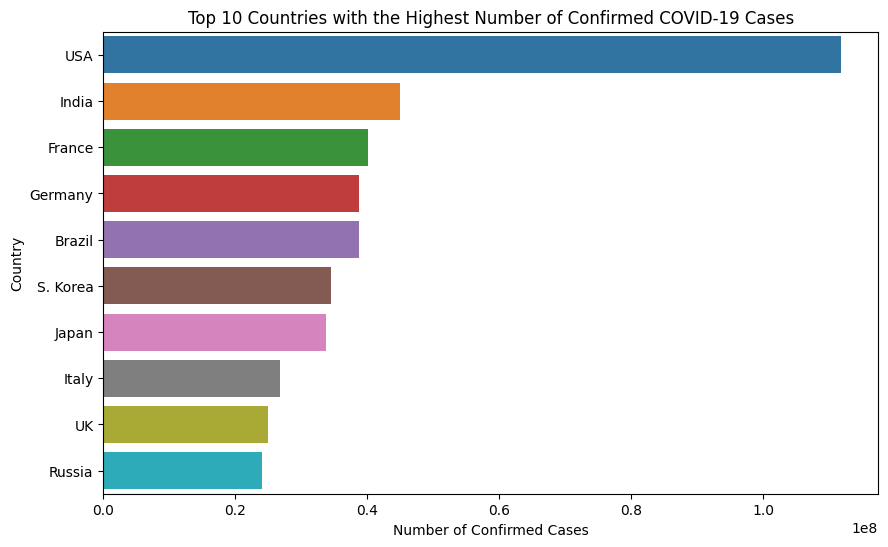

In [10]:
# 2. Top 10 countries with the highest number of confirmed cases
top_countries = df.groupby('country')['confirmed'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Highest Number of Confirmed COVID-19 Cases')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')
plt.show()

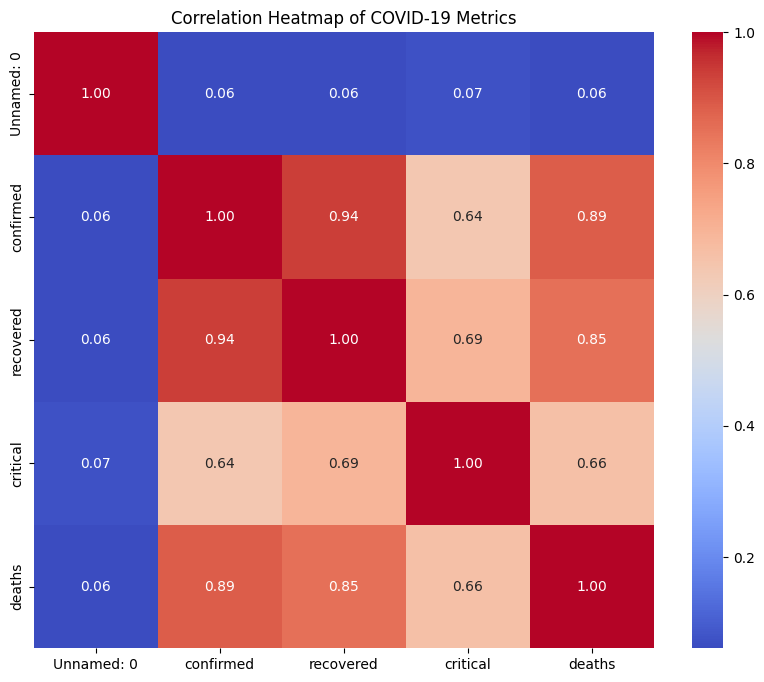

In [11]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()

In [12]:
import plotly.express as px

In [13]:
# Ensure the country names are in the correct format, and the column names match
df = df.rename(columns={'country': 'Country', 'confirmed': 'Confirmed'})

# Create the choropleth map
fig = px.choropleth(df,
                    locations="Country",
                    locationmode='country names',
                    color="Confirmed",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Worldwide COVID-19 Confirmed Cases")

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="Confirmed Cases",
        ticks="outside"
    )
)

# Show the map
fig.show()